In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# Task 1: Print the version of TensorFlow
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.20.0


In [3]:
# Task 2:  Create a "test_generator" using the "test_datagen" object
# Task 3: Print the length of the train_generator
base_dir = 'dataset' 
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,     # Data Augmentation to model study better
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False 
)

print(f"Length of train_generator: {len(train_generator)}")

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Length of train_generator: 32


In [4]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# 1.4 Print the summary of the model
model.summary()

# 1.5 Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
print("--- Starting Train (Feature Extraction) ---")
history_extract = model.fit(
    train_generator,
    epochs=5, 
    validation_data=test_generator
)

--- Starting Train (Feature Extraction) ---
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.6230 - loss: 1.6102 - val_accuracy: 0.8550 - val_loss: 0.3696
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.8240 - loss: 0.4033 - val_accuracy: 0.8600 - val_loss: 0.3417
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.8750 - loss: 0.3144 - val_accuracy: 0.8750 - val_loss: 0.3289
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.8710 - loss: 0.3146 - val_accuracy: 0.8900 - val_loss: 0.3158
Epoch 5/5
11/32 ━━━━━━━━━━━━━━━━━━━━ 1:30 4s/step - accuracy: 0.9022 - loss: 0.2728

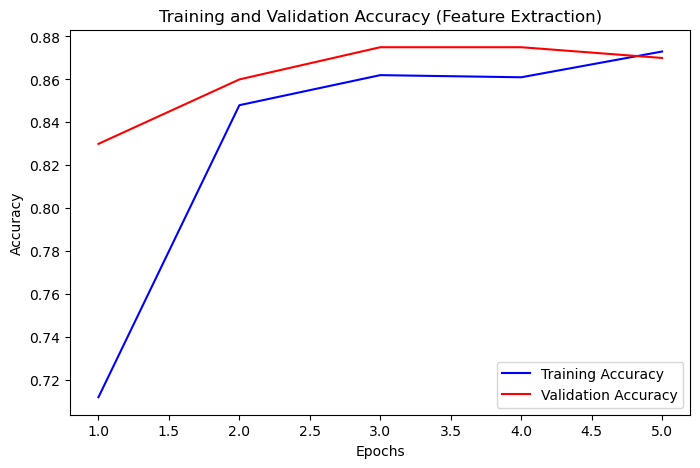

In [ ]:
# 1.6 Plot accuracy curves for training and validation sets (extract_feat_model)
acc = history_extract.history['accuracy']
val_acc = history_extract.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Feature Extraction)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

--- Bắt đầu Fine-Tuning ---
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9010 - loss: 0.2581 - val_accuracy: 0.8700 - val_loss: 0.3510
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.9030 - loss: 0.2550 - val_accuracy: 0.8700 - val_loss: 0.3484
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9110 - loss: 0.2377 - val_accuracy: 0.8700 - val_loss: 0.3475
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8870 - loss: 0.2659 - val_accuracy: 0.8750 - val_loss: 0.3452
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9070 - loss: 0.2394 - val_accuracy: 0.8750 - val_loss: 0.3440


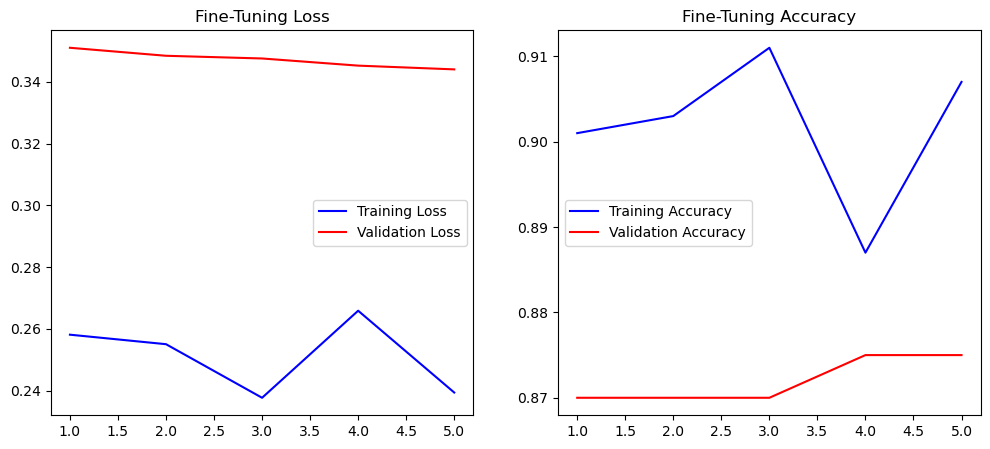

In [ ]:
# --- Fine-Tuning ---
base_model.trainable = True

for layer in base_model.layers[:15]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("--- Bắt đầu Fine-Tuning ---")
history_finetune = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)


acc_ft = history_finetune.history['accuracy']
val_acc_ft = history_finetune.history['val_accuracy']
loss_ft = history_finetune.history['loss']
val_loss_ft = history_finetune.history['val_loss']
epochs_ft = range(1, len(acc_ft) + 1)

# 1.7 Plot loss curves for training and validation sets (fine tune model)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_ft, loss_ft, 'b', label='Training Loss')
plt.plot(epochs_ft, val_loss_ft, 'r', label='Validation Loss')
plt.title('Fine-Tuning Loss')
plt.legend()

# 1.8 Plot accuracy curves for training and validation sets (fine tune model)
plt.subplot(1, 2, 2)
plt.plot(epochs_ft, acc_ft, 'b', label='Training Accuracy')
plt.plot(epochs_ft, val_acc_ft, 'r', label='Validation Accuracy')
plt.title('Fine-Tuning Accuracy')
plt.legend()
plt.show()

Plotting test image (Index 1):
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


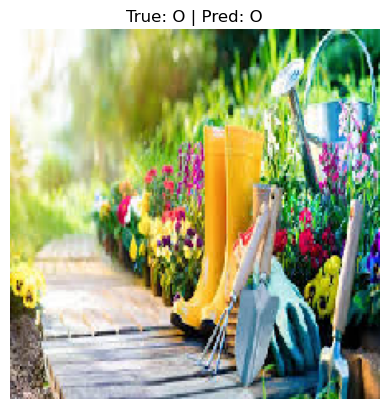

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


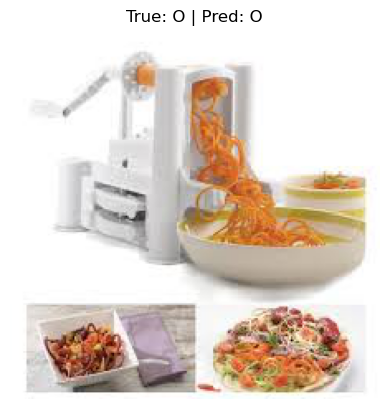

In [ ]:
def plot_test_prediction(generator, model, index_to_plot):
    images, labels = next(generator)
    
    img = images[index_to_plot]
    true_label_idx = int(labels[index_to_plot])
    
    img_batch = np.expand_dims(img, axis=0)
    pred_prob = model.predict(img_batch)[0][0]
    pred_label_idx = 1 if pred_prob > 0.5 else 0
    
    idx_to_class = {v: k for k, v in generator.class_indices.items()}
    
    true_classname = idx_to_class[true_label_idx]
    pred_classname = idx_to_class[pred_label_idx]
    
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {true_classname} | Pred: {pred_classname}")
    plt.show()

# 1.9 Plot a test image using Extract Features Model (index_to_plot = 1)
print("Plotting test image (Index 1):")
plot_test_prediction(test_generator, model, index_to_plot=1)

# 1.10 Plot a test image using Fine-Tuned Model (index_to_plot = 1)
plot_test_prediction(test_generator, model, index_to_plot=1)